In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='adam', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 133.91942
epoch  1 --- Loss --- 132.65866
epoch  2 --- Loss --- 131.36378
epoch  3 --- Loss --- 130.0552
epoch  4 --- Loss --- 128.7407
epoch  5 --- Loss --- 127.422935
epoch  6 --- Loss --- 126.10281
epoch  7 --- Loss --- 124.78052
epoch  8 --- Loss --- 123.4558
epoch  9 --- Loss --- 122.128204
epoch  10 --- Loss --- 120.79713
epoch  11 --- Loss --- 119.462
epoch  12 --- Loss --- 118.122345
epoch  13 --- Loss --- 116.8001
epoch  14 --- Loss --- 115.50815
epoch  15 --- Loss --- 114.21459
epoch  16 --- Loss --- 112.916626
epoch  17 --- Loss --- 111.61432
epoch  18 --- Loss --- 110.307816
epoch  19 --- Loss --- 108.99729
epoch  20 --- Loss --- 107.68686
epoch  21 --- Loss --- 106.39281
epoch  22 --- Loss --- 105.10769
epoch  23 --- Loss --- 103.81917
epoch  24 --- Loss --- 102.527176
epoch  25 --- Loss --- 101.23202
epoch  26 --- Loss --- 99.93796
epoch  27 --- Loss --- 98.64837
epoch  28 --- Loss --- 97.36149
epoch  29 --- Loss --- 96.07231
epoch  30 --- Loss --- 9

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 74.40972856283187 minutes


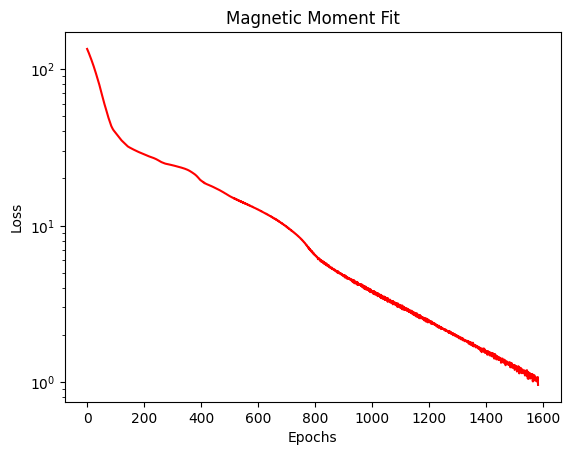

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.0036663   0.27487263 -0.01678065]]
Value:     [[-0.1083156  1.7152168  0.2671431]]
---- Moment  1 -----
Position:  [[ 0.50410146 -0.01427683 -0.00642414]]
Value:     [[0.9503207  0.08568825 0.05139427]]
---- Moment  2 -----
Position:  [[-0.02101905 -0.02733598  0.15982154]]
Value:     [[0.1511694  0.14577769 2.664025  ]]
